# Example using IDR web API to retrieve data / meta-information

## Check connection

In [74]:
from IPython.display import display, HTML
import requests

# initial data
IDR_BASE_URL = "https://idr.openmicroscopy.org"

In [77]:
INDEX_PAGE = "%s/webclient/?experimenter=-1" % IDR_BASE_URL

print("Homepage of IDR webclient: " + INDEX_PAGE)
# create http session
with requests.Session() as session:
    request = requests.Request('GET', INDEX_PAGE)
    prepped = session.prepare_request(request)
    response = session.send(prepped)
    if response.status_code != 200:
        response.raise_for_status()

Homepage of IDR webclient: https://idr.openmicroscopy.org/webclient/?experimenter=-1


## Get the overview of a dataset

In the IDR webclient, browser the IDR projeect on the left and select a project of interest. Click the project icon to expand its children on the left. On the right the screen, it will show a general tab with a screen ID (if it is a screen project) or a dataset ID if it is a dataset project. For screen project, change `'type':'project'` into `'type':'screen'`. An example use of web API is [https://idr.openmicroscopy.org/webclient/api/annotations/?type=map&project=2054](https://idr.openmicroscopy.org/webclient/api/annotations/?type=map&project=2054)

In [79]:
MAP_URL = "{base}/webclient/api/annotations/?type=map&{type}={project_id}"

PROJECT_ID = 2054

qs = {'base': IDR_BASE_URL, 'type': 'project', 'project_id': PROJECT_ID}
url = MAP_URL.format(**qs)
print("Dataset summary response: " + url)
for a in session.get(url).json()['annotations']:
    namespace = a['ns']
    for v in a['values']:
        key = v[0]
        value = v[1]
        print(key, value)

Dataset summary response: https://idr.openmicroscopy.org/webclient/api/annotations/?type=map&project=2054
Experiment A https://idr.openmicroscopy.org/webclient/?show=project-2051
Experiment B https://idr.openmicroscopy.org/webclient/?show=project-2052
Overview https://idr.openmicroscopy.org/webclient/?show=project-2054
Publication Title In situ genome sequencing resolves DNA sequence and structure in intact biological samples
Publication Authors Payne AC, Chiang ZD, Reginato PL, Mangiameli SM, Murray EM, Yao CC, Markoulaki S, Earl AS, Labade AS, Jaenisch R, Church GM, Boyden ES, Buenrostro JD, Chen F
PubMed ID 33384301 https://www.ncbi.nlm.nih.gov/pubmed/33384301
PMC ID PMC7962746 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7962746
Publication DOI 10.1126/science.aay3446 https://doi.org/10.1126/science.aay3446
Release Date 2021-09-21
License CC BY 4.0 https://creativecommons.org/licenses/by/4.0/
Copyright Payne et al
Data Publisher University of Dundee
Data DOI 10.17867/10000169 https

## Explore the human fibroblast IGS data

Now, choose the human fibroblast IGS data. The project ID is 2051. To view the JSON, open [https://idr.openmicroscopy.org/webclient/api/annotations/?type=map&project=2051](https://idr.openmicroscopy.org/webclient/api/annotations/?type=map&project=2051) in the browser.

In [80]:
PROJECT_ID = 2051

MAP_URL = "{base}/webclient/api/annotations/?type=map&{type}={project_id}"
qs = {'base': IDR_BASE_URL, 'type': 'project', 'project_id': PROJECT_ID}
url = MAP_URL.format(**qs)
print("Dataset summary response: "+ url)
for a in session.get(url).json()['annotations']:
    namespace = a['ns']
    for v in a['values']:
        key = v[0]
        value = v[1]
        print(key, value)

Dataset summary response: https://idr.openmicroscopy.org/webclient/api/annotations/?type=map&project=2051
Experiment A https://idr.openmicroscopy.org/webclient/?show=project-2051
Experiment B https://idr.openmicroscopy.org/webclient/?show=project-2052
Overview https://idr.openmicroscopy.org/webclient/?show=project-2054
Sample Type cell
Organism Homo sapiens
Study Type DNA sequencing
Imaging Method confocal microscopy
Publication Title In situ genome sequencing resolves DNA sequence and structure in intact biological samples
Publication Authors Payne AC, Chiang ZD, Reginato PL, Mangiameli SM, Murray EM, Yao CC, Markoulaki S, Earl AS, Labade AS, Jaenisch R, Church GM, Boyden ES, Buenrostro JD, Chen F
PubMed ID 33384301 https://www.ncbi.nlm.nih.gov/pubmed/33384301
PMC ID PMC7962746 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7962746
Publication DOI 10.1126/science.aay3446 https://doi.org/10.1126/science.aay3446
Release Date 2021-09-21
License CC BY 4.0 https://creativecommons.org/license

## Download/View Project annotation file

To view attachment associated with a project, change the `type=map` in the url into `type=file` as shown below. It will return a JSON with meta-information for annotation files associated with a project. 

An example use the web API is [https://idr.openmicroscopy.org/webclient/api/annotations/?type=file&project=2051]( https://idr.openmicroscopy.org/webclient/api/annotations/?type=file&project=2051). Values under the key **annotations** contain the annotation files. Notice that you can directly download the annotation file using the web API such as [https://idr.openmicroscopy.org/webclient/annotation/33424230](https://idr.openmicroscopy.org/webclient/annotation/33424230). The annotation file format can be text (csv) or OMERO.tables (a HDF5 object).

It is also possible to render the OMERO.tables using the web API. For example, for the OMERO.tables annotation file below, you can identify the **fiel ID** as **41884691**. Then you can use link like this: [https://idr.openmicroscopy.org/webclient/omero_table/41884691/](https://idr.openmicroscopy.org/webclient/omero_table/41884691/) to render the data as an html table. Alternatively, it is also possible to get the OMERO.tables as JSON such as [https://idr.openmicroscopy.org/webclient/omero_table/41884691/json](https://idr.openmicroscopy.org/webclient/omero_table/41884691/json) 

In [86]:
import os

PROJECT_ID = 2051

MAP_URL = "{base}/webclient/api/annotations/?type=file&{type}={project_id}"

qs = {'base': IDR_BASE_URL, 'type': 'project', 'project_id': PROJECT_ID}
url = MAP_URL.format(**qs)
print("Dataset annotation file response: " + url)
DOWNLOAD_URL = "{base}/webclient/annotation/{ann_id}"
download_list = []
for a in session.get(url).json()['annotations']:
    namespace = a['ns']
    print("Annotation ID: ", a['id'])
    print("\tFile name: ", a['file']['name'])
    print("\tFile ID: ", a['file']['id'])
    print("\tFile type: ", a['file']['mimetype'])
    qs['ann_id'] = a['id']
    download_list.append((DOWNLOAD_URL.format(**qs), a['file']['name']))
#for link in download_list:
#    os.system("wget -O%s -o log %s" % (link[1], link[0]))
print('\n'.join('\t'.join(item) for item in download_list))

Dataset annotation file response: https://idr.openmicroscopy.org/webclient/api/annotations/?type=file&project=2051
Annotation ID:  33424230
	File name:  Data_Table_Fibroblasts.csv
	File ID:  41884694
	File type:  text/csv
Annotation ID:  33424229
	File name:  Data_Description_Fibroblasts.csv
	File ID:  41884693
	File type:  text/csv
Annotation ID:  33423915
	File name:  bulk_annotations
	File ID:  41884691
	File type:  OMERO.tables
https://idr.openmicroscopy.org/webclient/annotation/33424230	Data_Table_Fibroblasts.csv
https://idr.openmicroscopy.org/webclient/annotation/33424229	Data_Description_Fibroblasts.csv
https://idr.openmicroscopy.org/webclient/annotation/33423915	bulk_annotations


## Get the dataset associated with project

In [87]:
PROJECT_ID = 2051

MAP_URL = "{base}/webclient/api/datasets/?{type}={project_id}"

qs = {'base': IDR_BASE_URL, 'type': 'id', 'project_id': PROJECT_ID}
url = MAP_URL.format(**qs)
print("Dataset from a project reponse: " + url)
dataset_list = []
for a in session.get(url).json()['datasets']:
    dataset = {}
    dataset['id'] = a['id']
    dataset['name'] = a['name']
    dataset['count']  = a['childCount']
    dataset_list.append(dataset)


Dataset from a project reponse: https://idr.openmicroscopy.org/webclient/api/datasets/?id=2051


In [88]:
dataset_list

[{'id': 15101, 'name': 'Fibroblasts_01', 'count': 4},
 {'id': 15159, 'name': 'Fibroblasts_02', 'count': 6},
 {'id': 15160, 'name': 'Fibroblasts_03', 'count': 11},
 {'id': 15161, 'name': 'Fibroblasts_04', 'count': 2},
 {'id': 15162, 'name': 'Fibroblasts_05', 'count': 2},
 {'id': 15163, 'name': 'Fibroblasts_06', 'count': 13},
 {'id': 15164, 'name': 'Fibroblasts_07', 'count': 16},
 {'id': 15165, 'name': 'Fibroblasts_08', 'count': 7},
 {'id': 15166, 'name': 'Fibroblasts_09', 'count': 3},
 {'id': 15167, 'name': 'Fibroblasts_10', 'count': 6},
 {'id': 15168, 'name': 'Fibroblasts_11', 'count': 2},
 {'id': 15169, 'name': 'Fibroblasts_12', 'count': 7},
 {'id': 15170, 'name': 'Fibroblasts_13', 'count': 8},
 {'id': 15171, 'name': 'Fibroblasts_14', 'count': 6},
 {'id': 15172, 'name': 'Fibroblasts_15', 'count': 3},
 {'id': 15173, 'name': 'Fibroblasts_16', 'count': 9},
 {'id': 15174, 'name': 'Fibroblasts_17', 'count': 13},
 {'id': 15175, 'name': 'Fibroblasts_18', 'count': 7},
 {'id': 15176, 'name': '

## Get Images from a dataset

To get the images from a dataset, use web API like this: [https://idr.openmicroscopy.org/webclient/api/images/?id=15101](https://idr.openmicroscopy.org/webclient/api/images/?id=15101), where **15101** is the dataset ID.

In [92]:
DATASET_ID = dataset_list[0]['id']

MAP_URL = "{base}/webclient/api/images/?{type}={dataset_id}"

qs = {'base': IDR_BASE_URL, 'type': 'id', 'dataset_id': DATASET_ID}
url = MAP_URL.format(**qs)
print("Image list response: " + url)
image_list = []
for a in session.get(url).json()['images']:
    image = {}
    image['id'] = a['id']
    image['name'] = a['name']
    image['fileId'] = a['filesetId']
    image_list.append(image)

Image overview response: https://idr.openmicroscopy.org/webclient/api/images/?id=15101


In [91]:
image_list

[{'id': 13457536, 'name': 'cell002_processed', 'fileId': 5285788},
 {'id': 13457535, 'name': 'cell006_processed', 'fileId': 5285787},
 {'id': 13457201, 'name': 'pgp1_fov01_hyb', 'fileId': 5285501},
 {'id': 13457226, 'name': 'pgp1_fov01_seq', 'fileId': 5285502}]

## Get Image overview (meta-information)

Get the meta-information (annotation) for an image is similar to the procedure of a project. You can use the following web API [ttps://idr.openmicroscopy.org/webclient/api/annotations/?type=map&image=13457536](ttps://idr.openmicroscopy.org/webclient/api/annotations/?type=map&image=13457536).

In [93]:
IMAGE_ID = 13457536

MAP_URL = "{base}/webclient/api/annotations/?type=map&{type}={image_id}"
qs = {'base': IDR_BASE_URL, 'type': 'image', 'image_id': IMAGE_ID}
url = MAP_URL.format(**qs)
print("Image overview response: " + url)
for a in session.get(url).json()['annotations']:
    namespace = a['ns']
    for v in a['values']:
        key = v[0]
        value = v[1]
        print(key, value)

Image overview response: https://idr.openmicroscopy.org/webclient/api/annotations/?type=map&image=13457536
Cell Line GM23248
Comment Cell Line PGP1f (Coriell GM23248) 
Organism Homo sapiens
Assay Name In situ genome sequencing
Channels Channel 1 (Cy5): dibases AT, CG, GC and TA; Channel 2 (FITC): dibases AA, CC, GG and TT; Channel 3 (Cy3): dibases AC, CA, GT and TG; Channel 4 (TxRed): dibases AG, CT, GA and TC; Channel 5: DAPI; Channel 6: Hybridization probe


## View Image annotation file

View the annotation associated with an image is also similar to the dataset, such as [https://idr.openmicroscopy.org/webclient/api/annotations/?type=file&image=13457536](https://idr.openmicroscopy.org/webclient/api/annotations/?type=file&image=13457536)

In [94]:
IMAGE_ID = 13457536

MAP_URL = "{base}/webclient/api/annotations/?type=file&{type}={image_id}"
qs = {'base': IDR_BASE_URL, 'type': 'image', 'image_id': IMAGE_ID}
url = MAP_URL.format(**qs)
print("Image annotation response: " + url)
for a in session.get(url).json()['annotations']:
    namespace = a['ns']
    print("Annotation ID: ", a['id'])
    print("\tFile name: ", a['file']['name'])
    print("\tFile ID: ", a['file']['id'])
    print("\tFile type: ", a['file']['mimetype'])

Image annotation response: https://idr.openmicroscopy.org/webclient/api/annotations/?type=file&image=13457536
Annotation ID:  33422603
	File name:  bulk_annotations
	File ID:  41884095
	File type:  OMERO.tables


## Parse Image annotation as data frame

We can parse the image annotation file as a pandas dataframe.

In [63]:
MAP_URL = "{base}/webclient/omero_table/{file_id}/json/"

ANNOTATION_ID = "41884095"

qs = {'base': IDR_BASE_URL, 'file_id': ANNOTATION_ID} 
url = MAP_URL.format(**qs)
print(url)
anno_table = session.get(url).json()['data']

https://idr.openmicroscopy.org/webclient/omero_table/41884095/json/


In [66]:
import pandas as pd
df = pd.DataFrame(data = anno_table['rows'], columns = anno_table['columns'])

In [72]:
display(HTML(df.head(10).to_html()))

,Roi,shape,cell_id,fov,fov_cell,amp_ind,x_um,y_um,z_um,region_size,hg38_chr,hg38_pos,umi_rol,purity_score,umi_seq,umi_cs,match_score,frag_len,hg38_ind,hamming_dist,cluster,mle_cluster,dist_to_edge_3d,dist_to_edge_2d,norm_r_3D,norm_r_2D,ab_comp,lads,rep_name,rep_class,rep_family,Roi Name
0,2363501,6609251,1,1,2,6,15.275229,19.933633,1.5,6,1,194631781,1.331442e+17,0.619711,TTGTATTAGTTTATGAATGCTGCCA,1.331442e+17,1.034495,81,430172,1,1,1,0.390607,0.446676,1.000000,1.000000,-1,1,,,,hg38_chr1
1,2363501,6609252,1,1,2,11,13.758540,17.225259,2.1,2,1,150295182,1.313231e+17,0.833465,AGGTAACAGCCGCCGGTGAAGCCCT,1.313231e+17,0.833465,253,311613,0,1,1,0.600000,3.344376,0.818702,0.699025,1,-1,AluYh3,SINE,Alu,hg38_chr1
2,2363501,6609253,1,1,2,31,14.950225,17.116924,1.5,3,1,225100477,1.212244e+17,1.417308,CATTGAGAATGCTAGTTCGTATTCA,1.214244e+17,1.589135,142,510598,1,1,1,0.900000,2.295577,0.791908,0.791297,-1,-1,,,,hg38_chr1
3,2363501,6609254,1,1,2,53,4.550068,12.133516,1.8,3,1,159490134,1.343424e+17,1.990848,AAGGTTGCATAGAGAAAGGTTACCT,1.243344e+17,1.990848,123,333514,0,2,2,0.647057,2.338630,0.699373,0.678700,-1,1,LTR81B,LTR,Gypsy,hg38_chr1
4,2363501,6609255,1,1,2,78,5.308413,12.566855,1.8,3,1,23787304,1.322132e+17,1.102639,GTATTAGTTTTGGTGTAGTATGCCA,1.322132e+17,1.134513,182,43138,1,2,2,0.871229,3.186227,0.601445,0.590854,1,-1,,,,hg38_chr1
5,2363501,6609256,1,1,2,232,13.650205,15.816904,1.5,4,1,153996406,2.414421e+17,2.324736,CTACGGATTATATGTCTTCTTTCCT,2.414421e+17,2.466447,159,319985,3,1,1,0.906497,3.871365,0.637350,0.599185,1,-1,,,,hg38_chr1
6,2363501,6609257,1,1,2,389,13.325200,18.633613,2.4,4,1,173788354,2.242424e+17,2.041239,ATAGTTGAGGATCGAGCGGGGGTAT,2.113314e+17,2.613091,140,371772,2,1,1,0.600000,2.375971,0.980375,0.821143,1,-1,,,,hg38_chr1
7,2363501,6609258,1,1,2,440,2.275034,14.083545,1.5,2,1,201029547,2.333314e+17,1.454619,TGGACGATCGAGGGTACTGGTGCCA,2.313314e+17,1.698928,387,448056,1,2,2,0.216670,0.216670,1.000000,0.978339,1,-1,MIRb,SINE,MIR,hg38_chr1
8,2363501,6609259,1,1,2,478,4.116729,13.325200,1.8,1,1,35436829,2.433424e+17,2.101219,CGTGCGTGTTTGATTAGGTTTTCCT,2.433424e+17,3.029592,219,65594,2,2,2,0.900000,2.103484,0.752805,0.744886,1,1,,,,hg38_chr1
9,2363501,6609260,1,1,2,673,4.333398,13.650205,1.5,4,1,27082504,3.334234e+17,2.125720,TTTAGGGTTGATGGTACTGTTGCCA,3.334214e+17,2.597073,343,48031,1,2,2,1.088837,2.277612,0.758454,0.722022,1,-1,L1ME3B,LINE,L1,hg38_chr1


## Get ROIs of an image

The JSON object of all ROIs associated with an image can be accessed like this [https://idr.openmicroscopy.org/api/v0/m/images/13457536/rois/](https://idr.openmicroscopy.org/api/v0/m/images/13457536/rois/)

The webclient link to a specific ROI is [https://idr.openmicroscopy.org/iviewer/?roi=2363501](https://idr.openmicroscopy.org/iviewer/?roi=2363501)

## Go to a specific shape of an image

The webclient link to a specicic shape is like this [https://idr.openmicroscopy.org/iviewer/?shape=6609251](https://idr.openmicroscopy.org/iviewer/?shape=6609251)

## View the image

To view the image meta-info, use the web API like this [https://idr.openmicroscopy.org/webclient/imgData/13457536/](https://idr.openmicroscopy.org/webclient/imgData/13457536/).

To display an image, use the link like this [https://idr.openmicroscopy.org/webclient/render_image/13457536](https://idr.openmicroscopy.org/webclient/render_image/13457536)

In [100]:
import json

IMAGE_ID = 13457536

IMAGE_DETAILS_URL = "{base}/webclient/imgData/{image_id}/"
qs = {'base': IDR_BASE_URL, 'image_id': IMAGE_ID}
url = IMAGE_DETAILS_URL.format(**qs)
print("image meta-data: " + url)
r = session.get(url)
if r.status_code == 200:
    print (json.dumps(r.json(), indent=4, sort_keys=True))

RENDER_IMAGE = "{base}/webclient/render_image/{image_id}"
img_url = RENDER_IMAGE.format(**qs)
print("image render link: " + img_url)

display(HTML("<img src='%s' />" % img_url))

image meta-data: https://idr.openmicroscopy.org/webclient/imgData/13457536/
{
    "channels": [
        {
            "active": true,
            "coefficient": 1.0,
            "color": "FFFFFF",
            "emissionWave": null,
            "family": "linear",
            "inverted": false,
            "label": "cy 1",
            "reverseIntensity": false,
            "window": {
                "end": 1200.0,
                "max": 65535.0,
                "min": 0.0,
                "start": 0.0
            }
        },
        {
            "active": true,
            "coefficient": 1.0,
            "color": "FFFFFF",
            "emissionWave": null,
            "family": "linear",
            "inverted": false,
            "label": "cy 2",
            "reverseIntensity": false,
            "window": {
                "end": 1200.0,
                "max": 65535.0,
                "min": 0.0,
                "start": 0.0
            }
        },
        {
            "active": tr

## Get Image thumbnail

The thumbnaill can be loaded as a JSON object like this [http://idr.openmicroscopy.org/webclient/get_thumbnails/?id=13457536](http://idr.openmicroscopy.org/webclient/get_thumbnails/?id=13457536). It is also possible to render the thumbnail as jpegs like this [http://idr.openmicroscopy.org/webclient/render_thumbnail/13457536](http://idr.openmicroscopy.org/webclient/render_thumbnail/13457536)

thumbnail as json: https://idr.openmicroscopy.org/webclient/get_thumbnail/13457536/
""
thumbnail render link: https://idr.openmicroscopy.org/webclient/render_thumbnail/13457536

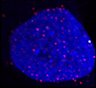

In [104]:
import json

IMAGE_ID = 13457536

IMAGE_DETAILS_URL = "{base}/webclient/get_thumbnail/{image_id}/"
qs = {'base': IDR_BASE_URL, 'image_id': IMAGE_ID}
url = IMAGE_DETAILS_URL.format(**qs)
print("thumbnail as json: " + url)
r = session.get(url)
if r.status_code == 200:
    print (json.dumps(r.json(), indent=4, sort_keys=True))

RENDER_IMAGE = "{base}/webclient/render_thumbnail/{image_id}"
img_url = RENDER_IMAGE.format(**qs)
print("thumbnail render link: " + img_url)

display(HTML("<img src='%s' />" % img_url))

In [ ]:
## 